<a href="https://colab.research.google.com/github/caiobfranklin/Data_Science_Pratica/blob/master/%5BAnalisando_os_Dados_do_Airbnb_na_cidade_de_Amsterdam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Amsterdam, North Holland, The Netherlands*


Quem quer viajar de férias para o exterior sabe a importância de realizar um planejamento dos gastos. Um dos itens a se preocupar e que demanda uma boa parte do orçamento da viagem é a hospedagem. 
Uma das melhores opções para viajantes é utilizar o [Airbnb](https://www.airbnb.com.br/). Apesar de não possuir nenhum hotel, é considera a maior empresa hoteleira da atualidade.

Ao realizar um levantamento de hospedagem na Europa, e tem como um dos destinos a  cidade de Amsterdam, acabam tendo uma impressão que a cobiçada cidade possuem valores mais altos que as demais cidades da Europa, apesar da quantidade de locais disponíveis. Mas será que esta informação realmente procede?

Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.





<center><img alt="Foto Amsterdam" width="70%" src="https://image.freepik.com/fotos-gratis/bicicleta-sobre-canal-amsterdao-cidade_35977-1111.jpg"></center>

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

Neste *notebook*, iremos analisar os dados referentes à **cidade Amsterdam, North Holland, The Netherlands**, e ver quais insights podem ser extraídos a partir de dados brutos.


Estudo realizado para curso de Data Science na Pática. [sigmoidal.ai](https://sigmoidal.ai)

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in  Amsterdam  (good for visualisations).*


In [0]:
import pandas as pd # importar os pacotes necessarios

In [0]:
import matplotlib.pyplot as plt

In [0]:
import seaborn as sns

In [0]:
%matplotlib inline

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2020-05-08/visualisations/listings.csv")

## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [0]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,2.05,1,157
1,9693,Top Location on Canal (Center Flat),32366,Sabine And Sander,NaN,Centrum-West,52.37802,4.89270,Entire home/apt,119,3,55,2018-06-29,0.45,1,36
2,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36509,4.89354,Private room,100,1,340,2020-04-09,2.74,2,112
3,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Joan,NaN,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,5,2020-02-09,0.18,1,132
4,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,155,2,217,2020-03-02,2.14,1,287


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.
Este dataset que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo listings.csv.

In [0]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))
# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 19278
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `availability_365`, `calculated_host_listings_count`, `number_of_reviews`,
`minimum_nights`,`price`,`room_type`, `longitude`, `latitude`,`neighbourhood`, `host_id` e `id`
possuem 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em mais da metade das linhas.
* A variável `name` tem aproximadamente 0,1% dos valores nulos.
* A variável `host_name`tem menos de 0,1% dos valores nulos.

In [0]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.119203
last_review                       0.119203
name                              0.001712
host_name                         0.000156
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff83983d588>,
      dtype=object)

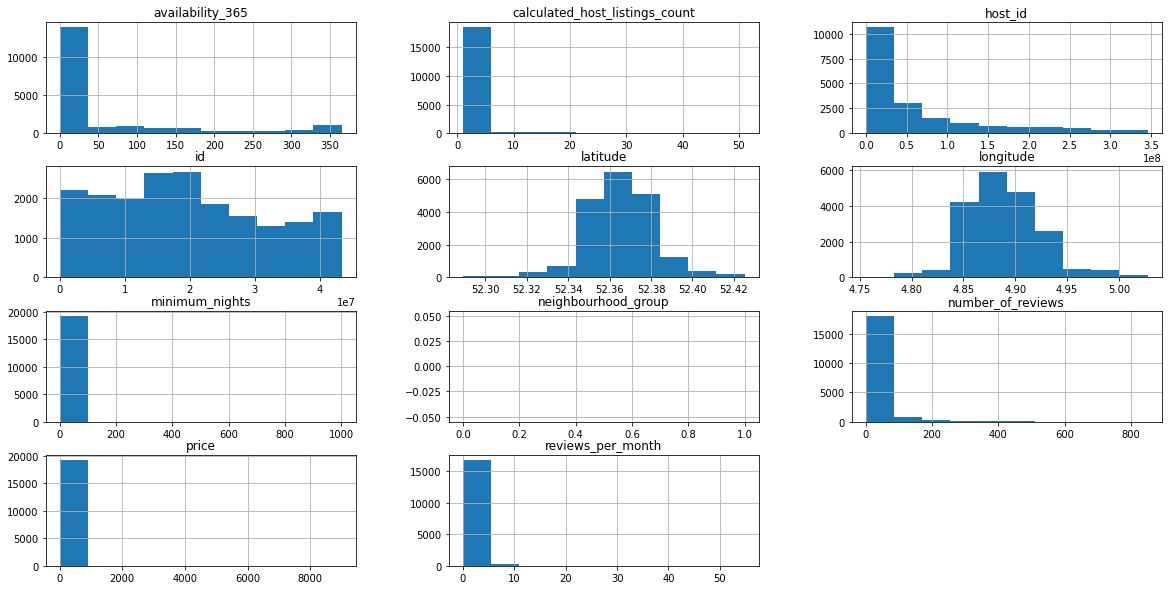

In [0]:
# plotar o histograma das variáveis numéricas
df.hist(bins=10, figsize=(20,10))

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `availability 365', `calculated_host_listing_count, `price`, `minimum_nights` e `reviews_per_month`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [0]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,19278.000000,19278.000000,19278.000000,16980.000000,19278.000000,19278.000000
mean,165.722430,3.517533,25.283017,0.790479,1.975101,54.549798
std,233.884293,13.570089,54.496400,1.284863,4.482957,102.544437
min,5.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,99.000000,2.000000,2.000000,0.180000,1.000000,0.000000
50%,131.000000,2.000000,9.000000,0.410000,1.000000,0.000000
75%,189.000000,3.000000,24.000000,0.810000,1.000000,65.000000
max,9000.000000,1001.000000,850.000000,54.800000,51.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:
A variável price possui 75% do valor abaixo de 189, porém seu valor máximo é 19278.
A quantidade mínima de noites (minimum_nights) está acima de 365 dias no ano.

####Boxplot para price

NameError: ignored

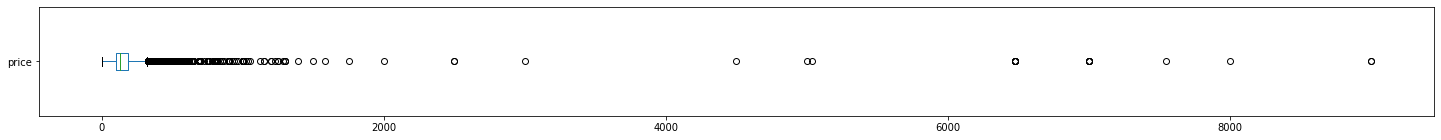

In [0]:
# price
df.price.plot(kind='box', vert=False, figsize=(25, 2),)
plt.show()

# ver quantidade de valores acima de 2000 para price
print("\nprice: valores acima de 2000")
print("{} entradas".format(len(df[df.price > 2000])))
print("{:.4f}%".format((len(df[df.price > 2000]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histogramas sem *outliers*

Já que identificamos *outliers* em algumas nas variáveis , vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

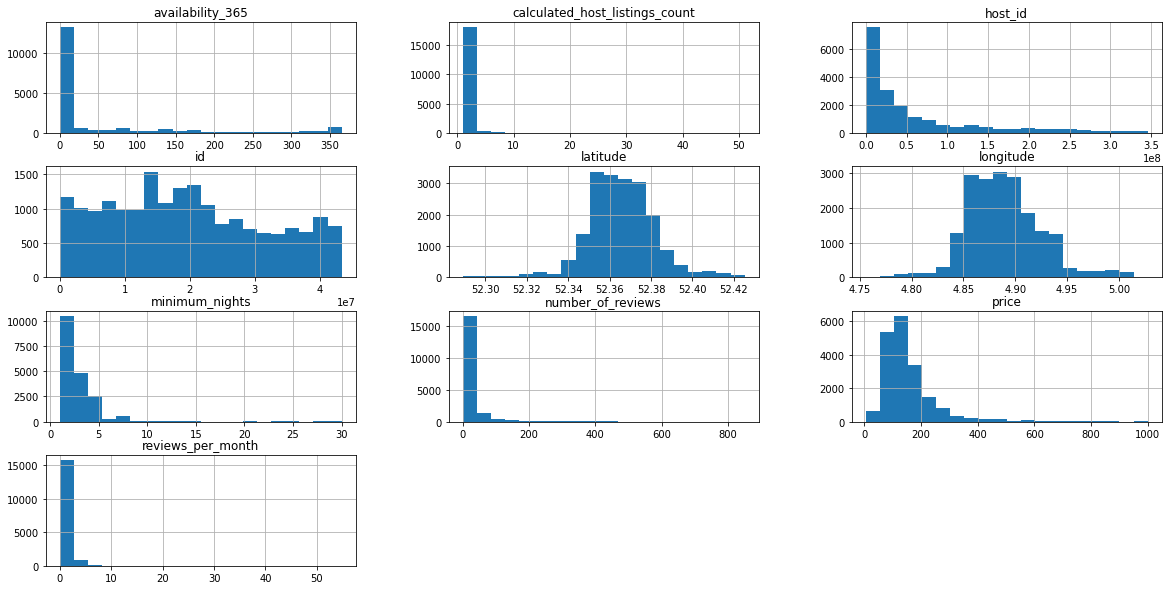

In [0]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=20, figsize=(20,10));

### **Q4. Qual a média dos preços de aluguel?**

In [0]:
# ver a média da coluna `price`
print("A média dos preços de aluguel de Amsterdam é ${:.0f} por dia".format(df.price.mean()))

A média dos preços de aluguel de Amsterdam é $166 por dia


### **Q5. Qual a correlação existente entre as variáveis**


Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [0]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.018155,-0.089800,-0.039844,0.084904,0.191415
minimum_nights,0.018155,1.000000,-0.063329,-0.105775,-0.000446,0.030447
number_of_reviews,-0.089800,-0.063329,1.000000,0.759429,-0.019791,0.286082
reviews_per_month,-0.039844,-0.105775,0.759429,1.000000,0.037729,0.321761
calculated_host_listings_count,0.084904,-0.000446,-0.019791,0.037729,1.000000,0.157977
availability_365,0.191415,0.030447,0.286082,0.321761,0.157977,1.000000


In [0]:
# plotar um heatmap a partir das correlações


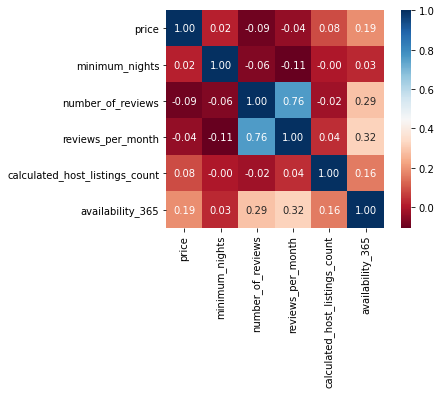

In [0]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Amsterdam?**

A coluna da variável room_type indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.
Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método value_counts().

Podemos notar que o `entire home/ap`é do tipo de aluguel mais ofertado, com quase 80%.

In [0]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    14944
Private room        3893
Hotel room           273
Shared room           43
Name: room_type, dtype: int64

In [0]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts()/df_clean.shape[0]

Entire home/apt    0.780243
Private room       0.203258
Hotel room         0.014254
Shared room        0.002245
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara de Amsterdam?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [0]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Centrum-West                196.215064
Centrum-Oost                192.553744
Zuid                        182.530015
De Pijp - Rivierenbuurt     164.537945
Oud-Noord                   159.466549
IJburg - Zeeburgereiland    159.229759
Westerpark                  152.223308
De Baarsjes - Oud-West      149.615098
Oud-Oost                    147.382588
Watergraafsmeer             146.444649
Name: price, dtype: float64

Para ver se não existe discrepâncias nos dados apresentados, devemos checar a quantida de imóveis ofertados por estes primeiros bairros.
Podemos notar que existe um confiabilidade baseada nos dados apresentados abaixo, tem variação de 1300 a 2300 de imóveis ofertados.

In [0]:
print(df_clean[df_clean.neighbourhood == "Centrum-West"].shape)

(2111, 15)


In [0]:
print(df_clean[df_clean.neighbourhood == "Centrum-Oost"].shape)

(1656, 15)


In [0]:
print(df_clean[df_clean.neighbourhood == "Zuid"].shape)

(1366, 15)


In [0]:
print(df_clean[df_clean.neighbourhood == "De Pijp - Rivierenbuurt"].shape)

(2385, 15)


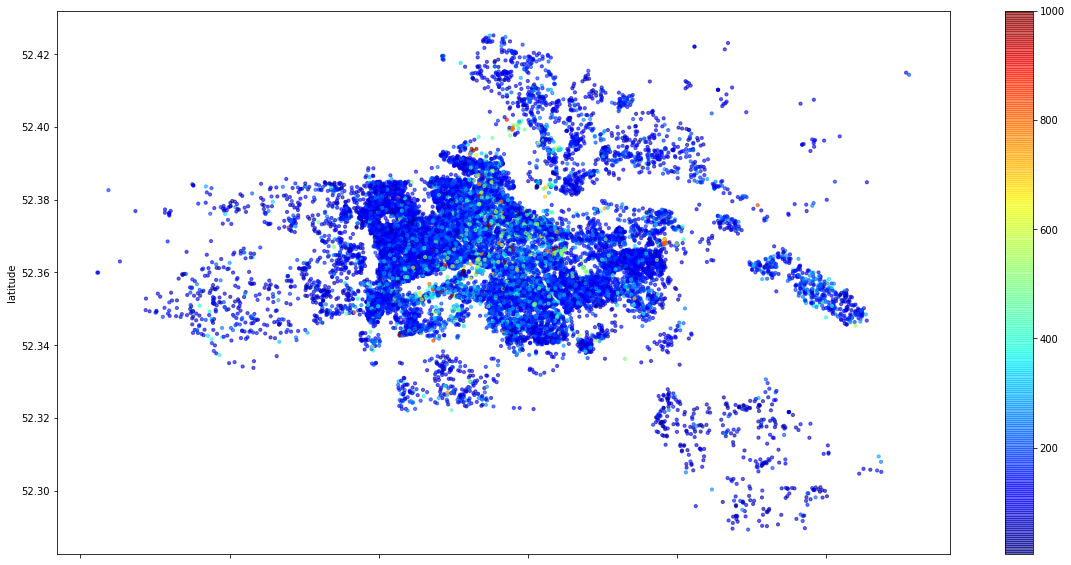

In [0]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.6, c=df_clean['price'], s=10, 
              cmap=plt.get_cmap('jet'), figsize=(20,10));

<center><img alt="Foto Amsterdam" width="70%" src="https://as1.ftcdn.net/jpg/02/90/76/02/500_F_290760298_dO9252nEOL076ImTXCpdWzzwR34Q8Ctb.jpg"></center>

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [0]:
# ver a média da coluna `minimum_nights``
print("A média mínimo de noites alugados em Amsterdam é {:.0f} dias ".format(df.minimum_nights.mean()))

A média mínimo de noites alugados em Amsterdam é 4 dias 


## Conclusões

Foi feita breve uma análise superficial na base de dados do Airbnb da cidade de Amsterdam. 
O dataset utilizado é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos.
Chegamos aos seguintes resultados :
 * A média de preço é de $ 166 dolares por noite
 * A média minima de noite é de 4.
 * A região central de Amsterdam é a mais cara.
